# F1-F2 plots with R
In this tutorial, we load a table containing F1 and F2 values at vowel midpoint from vowels spoken by male speakers of Standard Southern British English.
It's good practice to have an advanced text editor installed on your PC. Notepad++ (https://notepad-plus-plus.org/downloads/) is a good option. Among other things it allows you to check (and change) character encoding, end-of-line character, delimiter (tab, comma, etc.). 

In [1]:
#load the table and displays first 6 lines
phonData = read.table('data3SseUTF8.txt', header = T, encoding = 'UTF-8')
head(phonData)

spk,inter,symbolASCII,symbolUTF8,F1,F2,F3
mjcSse,2,i-#f,i<U+02D0>,282.756,2485.008,3083.889
mjcSse,4,-ic,<U+026A>,464.152,2077.771,2687.396
mjcSse,6,e,e,688.513,1865.774,2645.545
mjcSse,8,-ae,æ,901.896,1549.408,2646.618
mjcSse,10,-as-#f,<U+0251><U+02D0>,760.724,1198.293,2745.529
mjcSse,12,-vt,<U+028C>,749.623,1464.558,2600.163


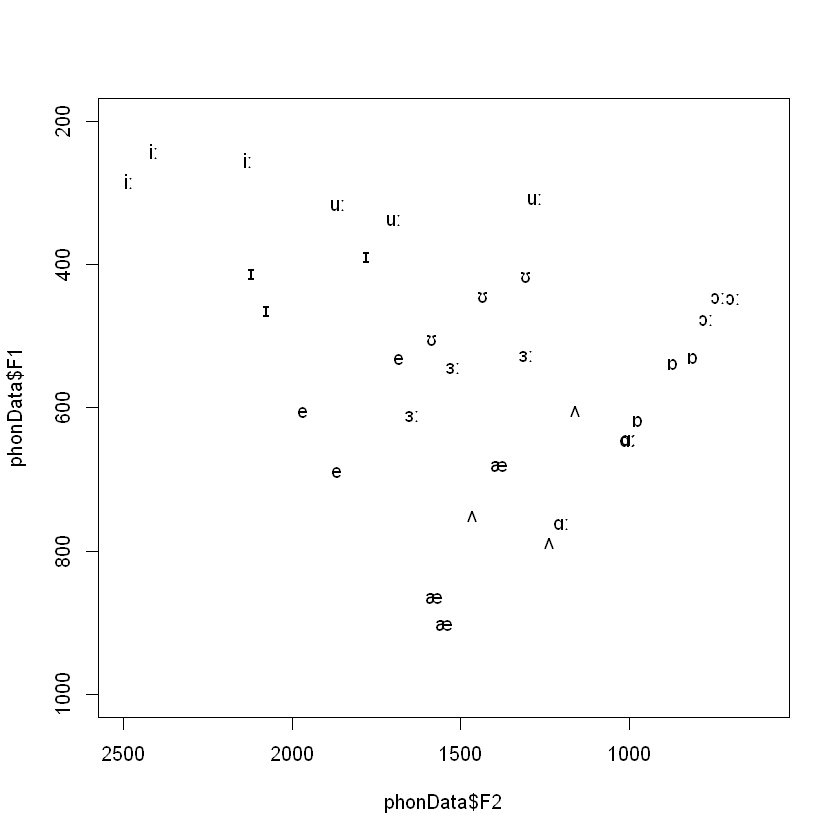

In [2]:
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200))
text(phonData$F2, phonData$F1, phonData$symbolUTF8)

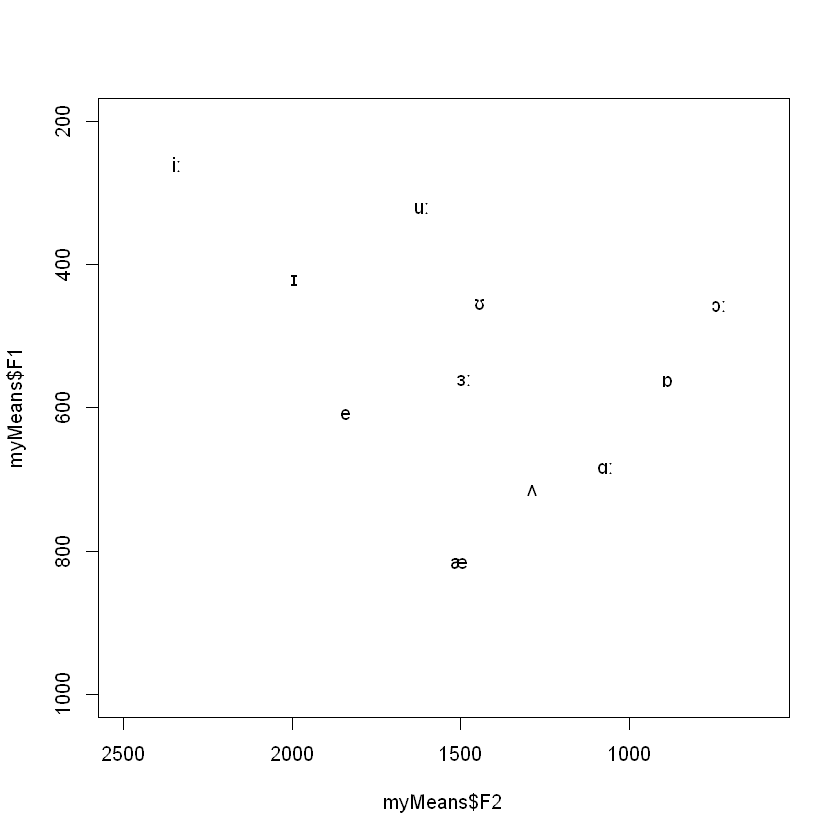

In [56]:
#Let's plot vowel means
myMeans = aggregate(cbind(phonData$F1,phonData$F2),list(phonData$symbolUTF8),mean)
colnames(myMeans) = c("Vowel", "F1", "F2")
plot(myMeans$F2, myMeans$F1, type="n", xlim=c(2500,600), ylim=c(1000,200))
text(myMeans$F2, myMeans$F1,myMeans$Vowel)

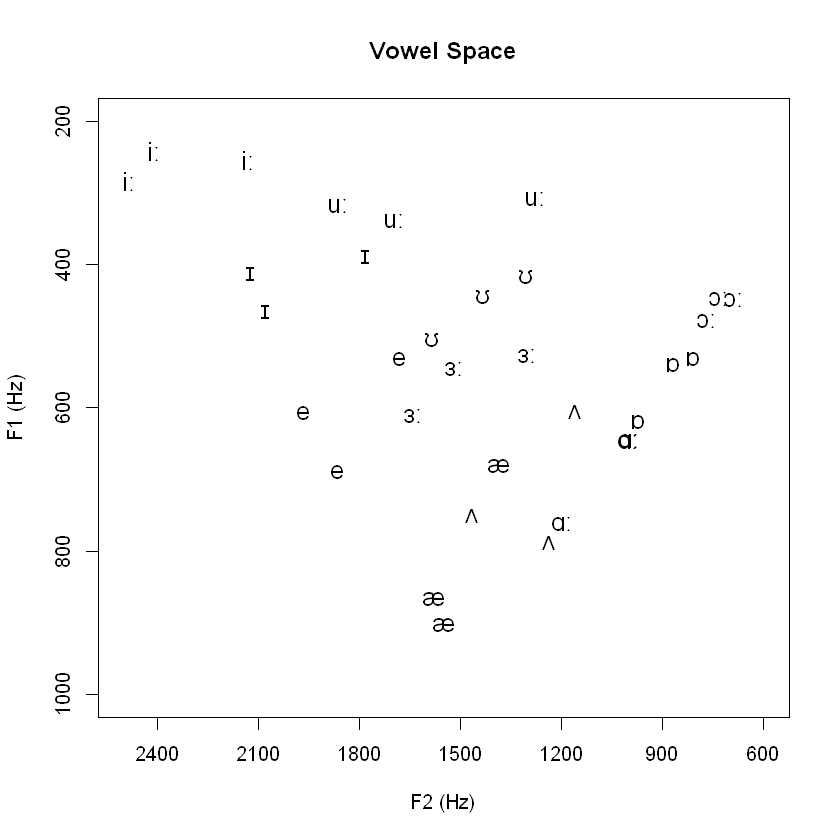

In [57]:
#now we want a title, better tick spacing, and better axis labels, bigger font size...
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), xlab = "F2 (Hz)", ylab = "F1 (Hz)", 
     main = "Vowel Space", xaxt="n", yaxt = "n")
axis(side=1,seq(from = 600, to = 2500, by = 300))
axis(side=2,seq(from = 200, to = 1000, by = 200))
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)
#note aspect ratio setting (asp) overrides xlim and ylim

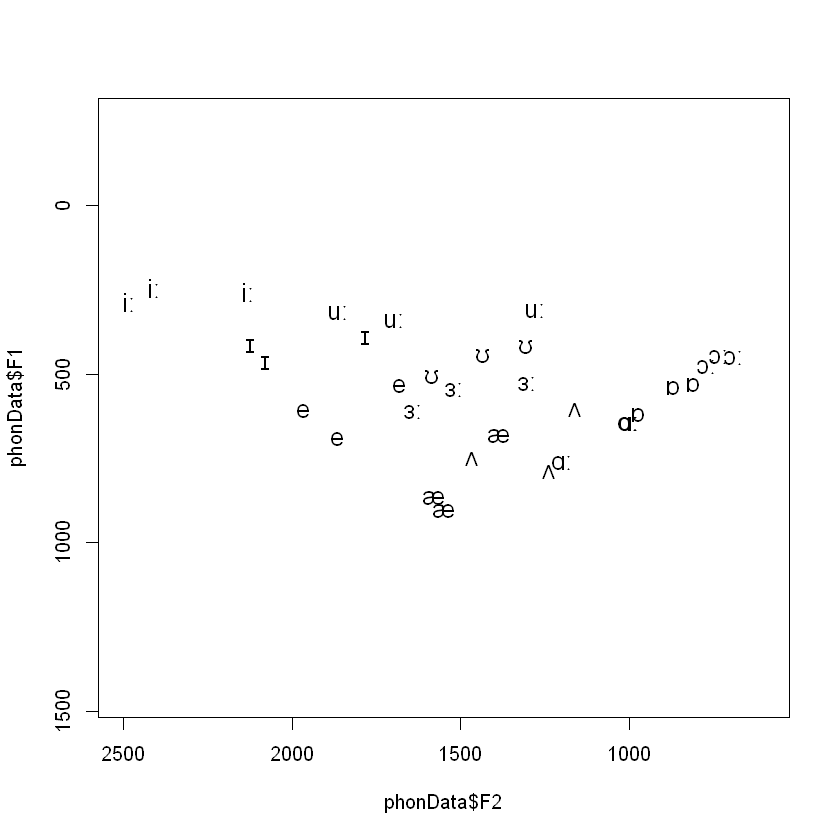

In [58]:
#playing with y/x ratio: here n Hz have the same size on screen in both axes
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 1)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

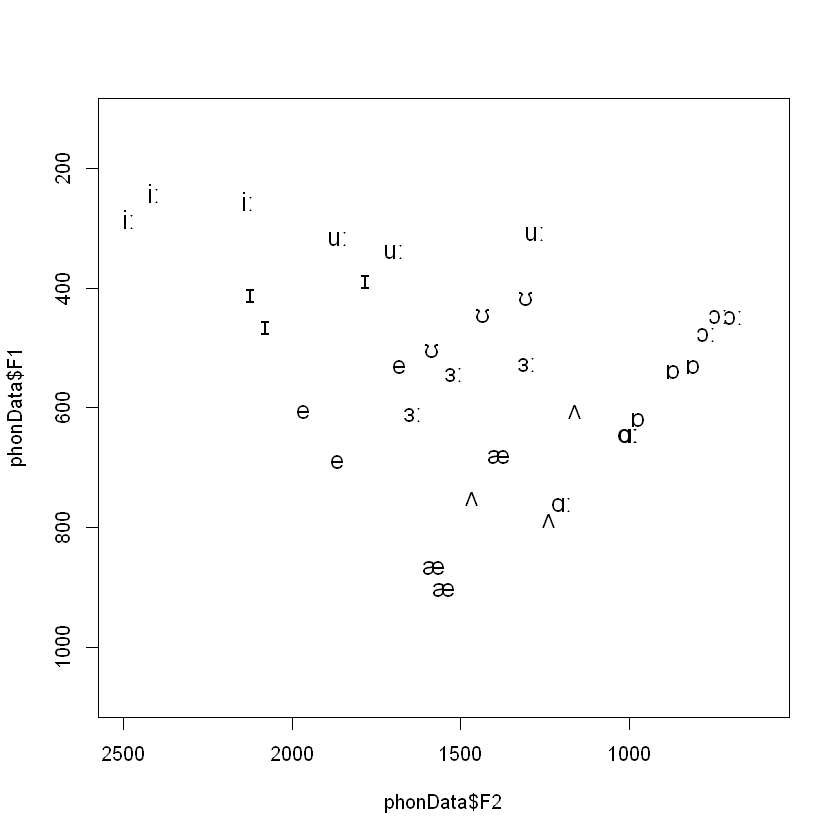

In [59]:
#next one is closer to the traditional plot
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 16/9)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

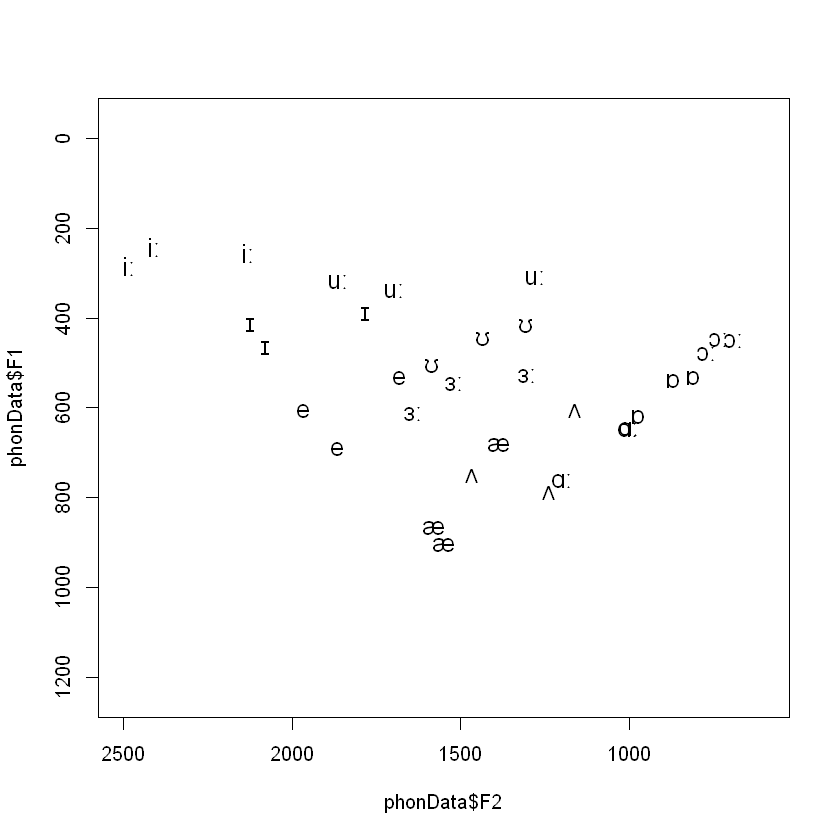

In [60]:
#if asp is smaller than 1, it gives more weight to F1
#pre-2000 TV ratio:
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 4/3)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

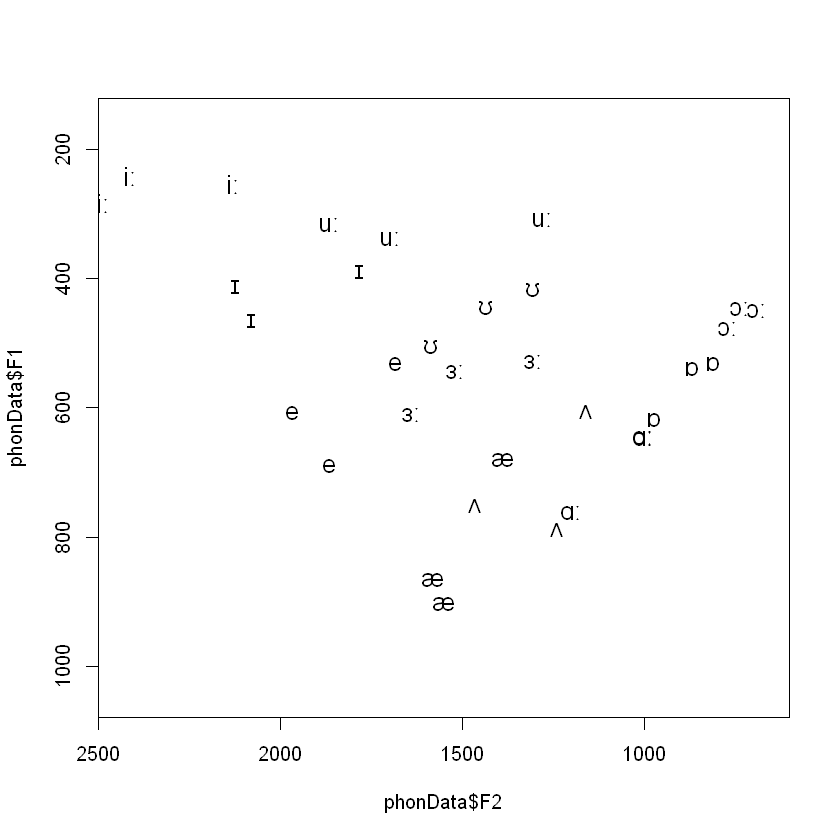

In [61]:
#ok let's stick to the 16/9 format and control axis limits exactly
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 16/9, xaxs = 'i', yaxs = 'i')
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

As the name suggests, "base R" functions are the essential bits that are automatically installed (and loaded within R). More specific needs are covered by dedicated packages. The phonR package is a good choice to plot vowels. 

In [5]:
#install
#install.packages("phonR")
#load
library(phonR)


Warning message:
"package 'phonR' was built under R version 3.6.3"

In [9]:
unique(phonData$spk)

[1] mjcSse przSse rkmSse
Levels: mjcSse przSse rkmSse

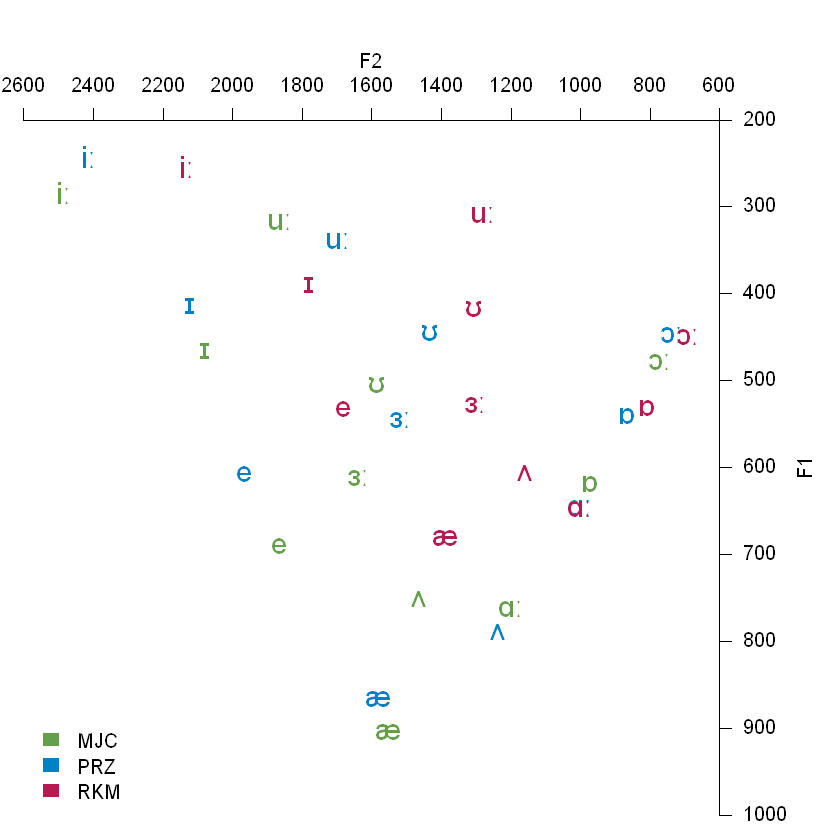

In [13]:
#plot all vowels; each speaker with a different colour
plotVowels(phonData$F1, phonData$F2, pch.tokens = phonData$symbolUTF8, cex.tokens = 1.5, 
           var.col.by = phonData$spk, pretty=T,legend.kwd = "bottomleft", 
           legend.args=list(legend=c(text = c("MJC", "PRZ", "RKM"))))

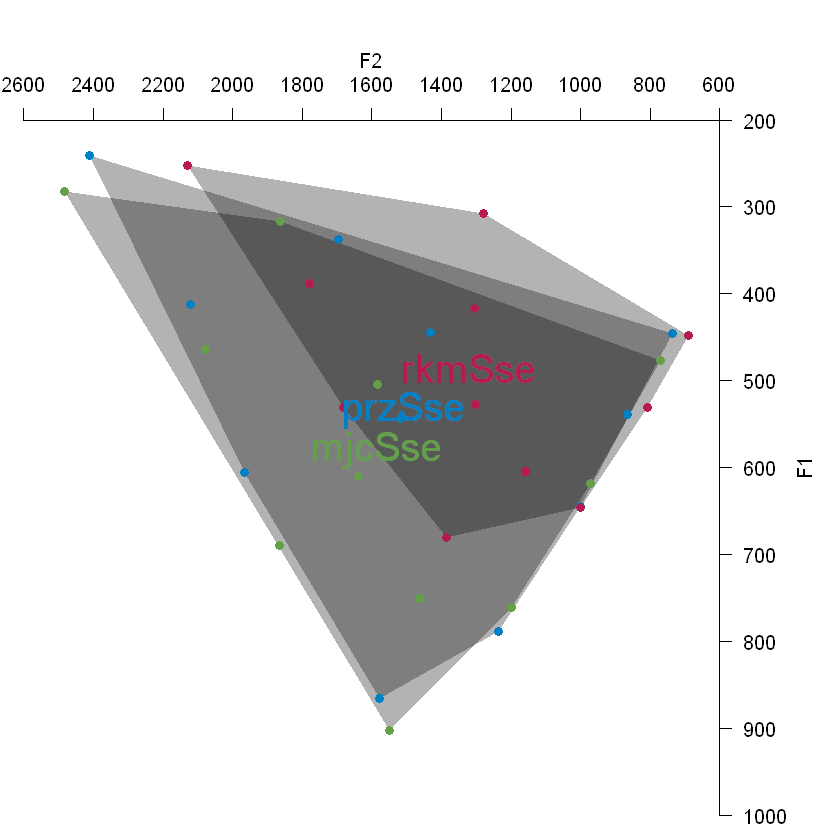

In [64]:
#plots the convex hull of each speaker's vowel space with mean phoneme values
plotVowels(phonData$F1, phonData$F2, phonData$spk, group=phonData$spk, plot.tokens = T, 
           plot.means = T, pch.means = phonData$spk, cex.means = 2, var.col.by = phonData$spk,
           hull.fill = TRUE, fill.opacity = 0.3, pretty = T)
#incidentally the shades of grey let you guess the degree of overlap between individual vowels spaces
#the darker areas is where all three polygons overlap, i.e. the area that all three subjects have in
#common, which is not much compared to the the spread of all F1 and F2 values, bearing in mind that these
#speakers are all male and speak with a similar accent

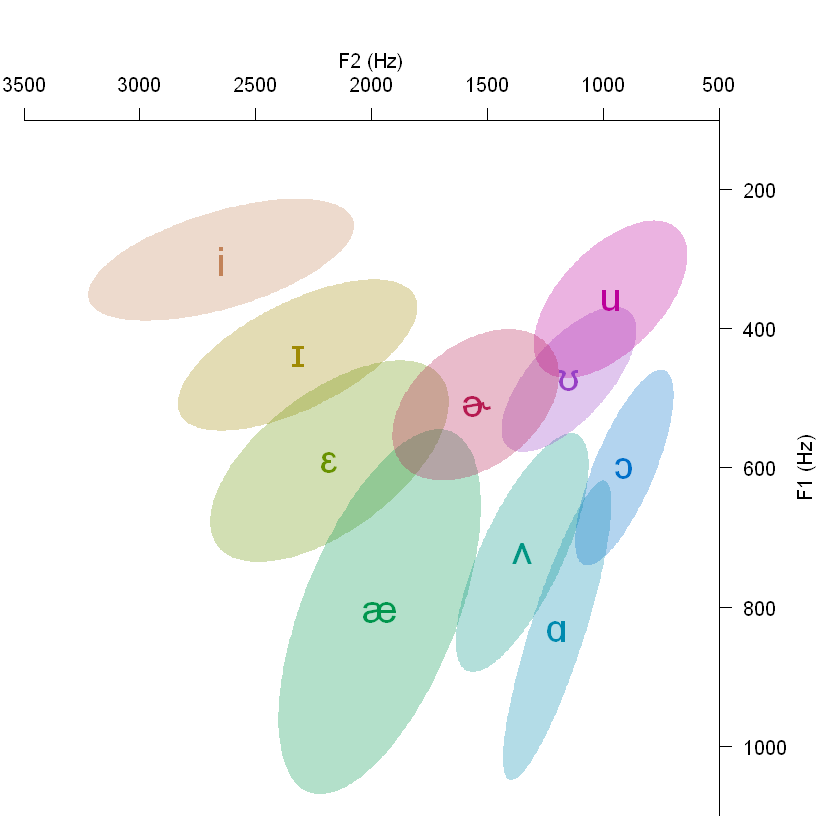

In [15]:
#ok now we want a bigger dataset... the good old formant data by Peterson and Barney
pbData = read.table('pb.txt', header = T, encoding = 'UTF-8')
plotVowels(pbData$F1, pbData$F2, pbData$IPA, plot.tokens = F, plot.means = T, pch.means = pbData$IPA, 
           cex.means = 2,var.col.by = pbData$IPA, ellipse.fill = T, pretty = T, xlim = c(3500, 500),
           ylim = c(1100,100), xlab = 'F2 (Hz)', ylab = 'F1 (Hz)')


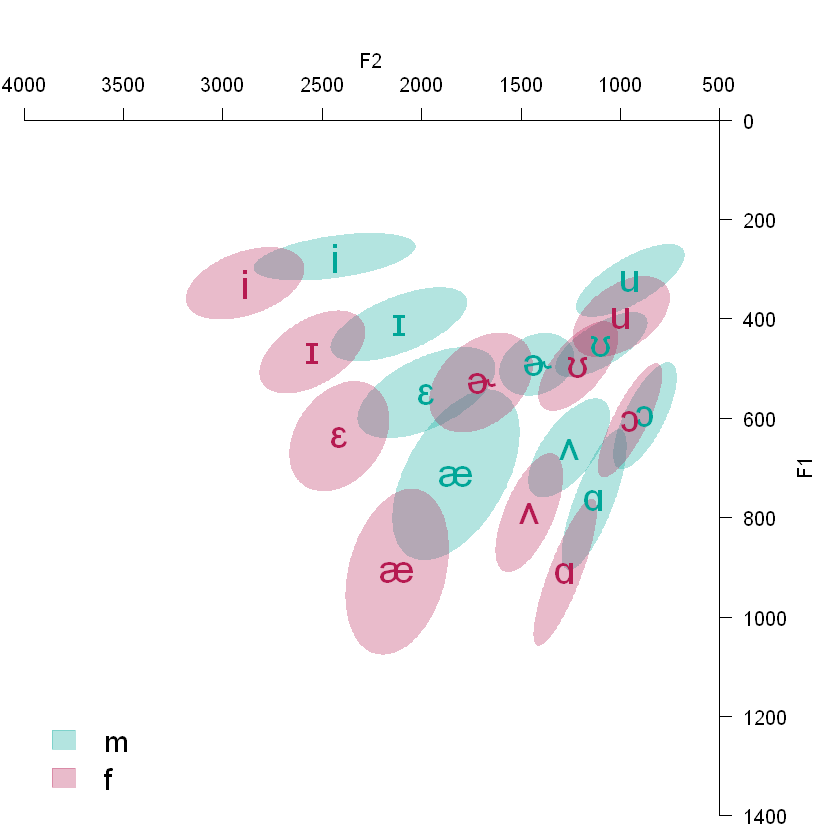

In [17]:
#split by sex
plotVowels(pbData$F1, pbData$F2, pbData$IPA, group=pbData$Sex, plot.tokens = F, 
           plot.means = T, pch.means = pbData$IPA, cex.means = 2, var.col.by = pbData$Sex, legend.kwd = 'bottomleft', ellipse.fill = T,
           ellipse.conf = 0.5, legend.args = list(cex = 1.5), pretty = T)

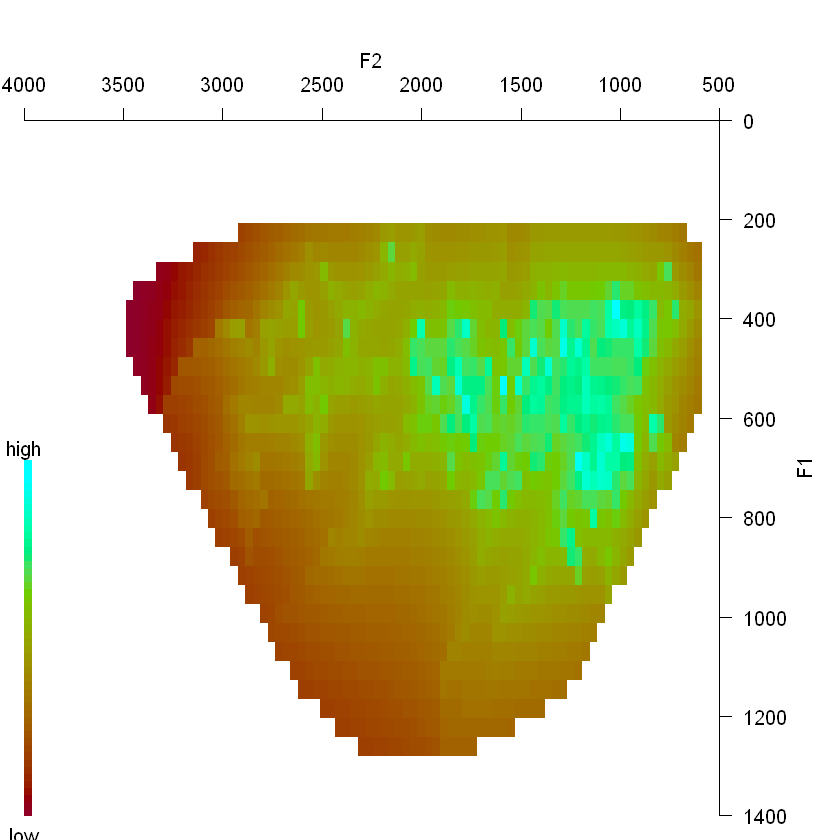

In [5]:
#a heatmap... I don't like it...
plotVowels(pbData$F1, pbData$F2, pbData$Vowel, plot.tokens = FALSE, heatmap = TRUE, heatmap.legend = TRUE, 
           heatmap.args = list(resolution = 30), pretty = TRUE)
#resolution = 30 takes approx 30 secs
#more examples here: https://drammock.github.io/phonR/

# Distance measurements
Now we move on to distance measurements, starting with pairwise Euclidean distances in the F1/F2 space:

In [65]:
myDists = as.matrix(dist(cbind(myMeans$F1, myMeans$F2),diag=TRUE, upper=TRUE))
myCombs = t(combn(myMeans$Vowel, 2))
distDf = data.frame(vow1 = myCombs[,1], vow2 = myCombs[,2], dists = t(myDists)[lower.tri(myDists)])
print(distDf)
#oddly enough while you can display the first column with the right characters (rather than
#the UTF-8 code) with distDf$vow1; it doesn't seem to work with the whole dataframe at once


               vow1             vow2     dists
1  <U+0251><U+02D0>         <U+0252>  220.4728
2  <U+0251><U+02D0> <U+0254><U+02D0>  403.6139
3  <U+0251><U+02D0> <U+025C><U+02D0>  438.1804
4  <U+0251><U+02D0>         <U+026A>  962.3393
5  <U+0251><U+02D0>         <U+028A>  438.5963
6  <U+0251><U+02D0>         <U+028C>  222.3359
7  <U+0251><U+02D0>                æ  457.1642
8  <U+0251><U+02D0>                e  774.9916
9  <U+0251><U+02D0>        i<U+02D0> 1343.6654
10 <U+0251><U+02D0>        u<U+02D0>  655.6528
11         <U+0252> <U+0254><U+02D0>  183.1799
12         <U+0252> <U+025C><U+02D0>  604.2752
13         <U+0252>         <U+026A> 1118.6882
14         <U+0252>         <U+028A>  568.2388
15         <U+0252>         <U+028C>  431.7292
16         <U+0252>                æ  671.3120
17         <U+0252>                e  956.3212
18         <U+0252>        i<U+02D0> 1489.8190
19         <U+0252>        u<U+02D0>  768.6812
20 <U+0254><U+02D0> <U+025C><U+02D0>  761.2222
21 <U+0254><U

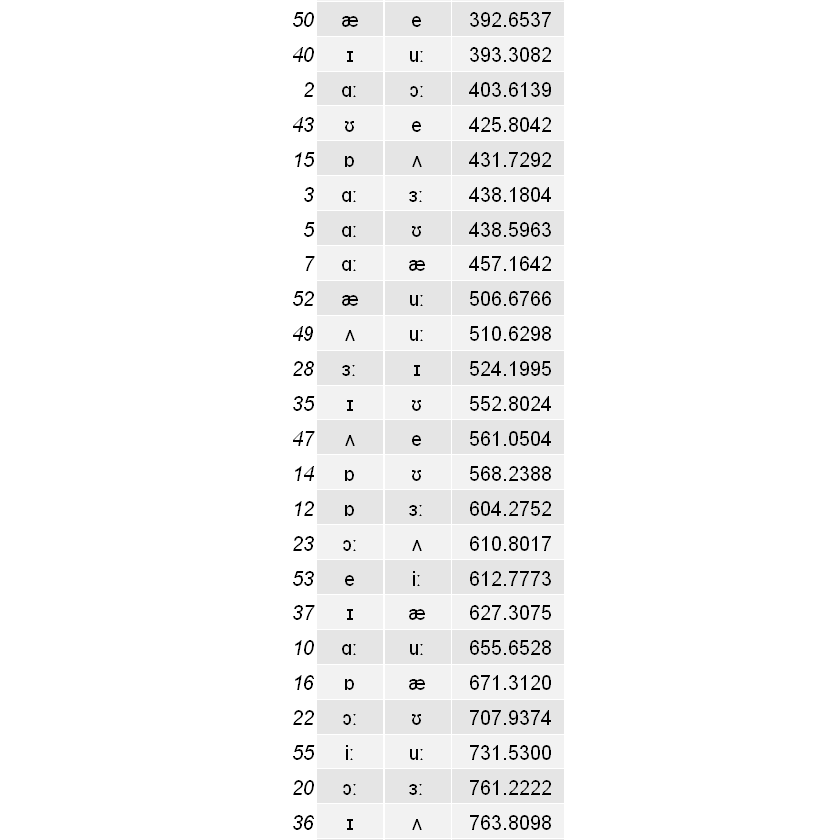

In [78]:
#this prints out utf8 chars, but not all the rows
#install.packages("gridExtra")
#library(gridExtra)
#let's sort distance in ascending order
newDistDf = distDf[order(distDf$dists),]
grid.table(newDistDf)


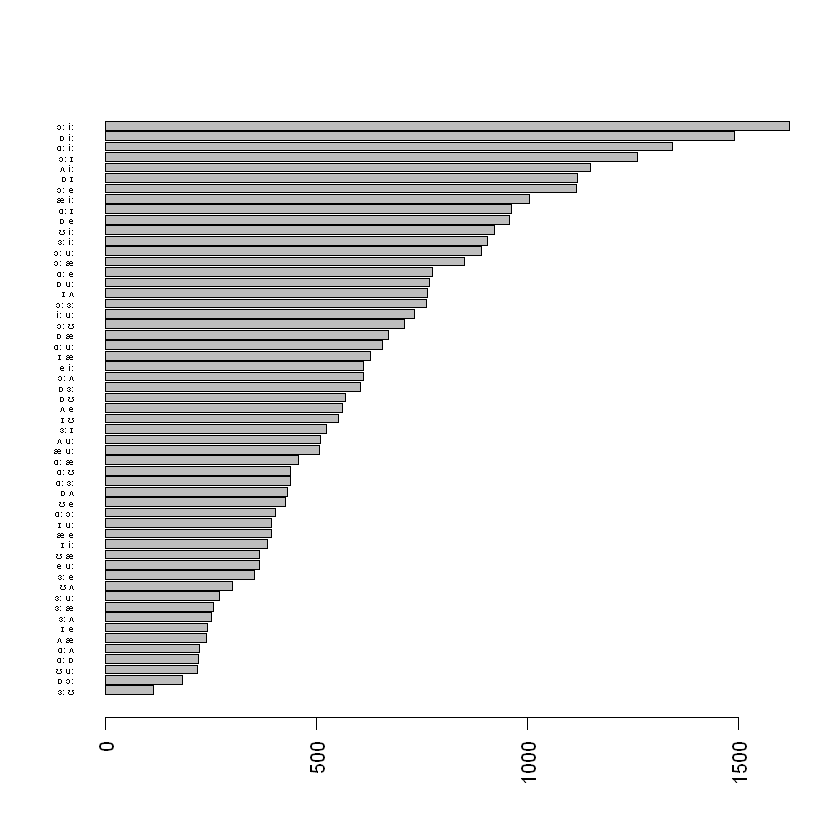

In [89]:
#a horizontal barplot shows pairwise distances in descending order
barplot(newDistDf$dists, horiz = TRUE, names.arg = paste(newDistDf$vow1, newDistDf$vow2),cex.names=0.5, las = 2)

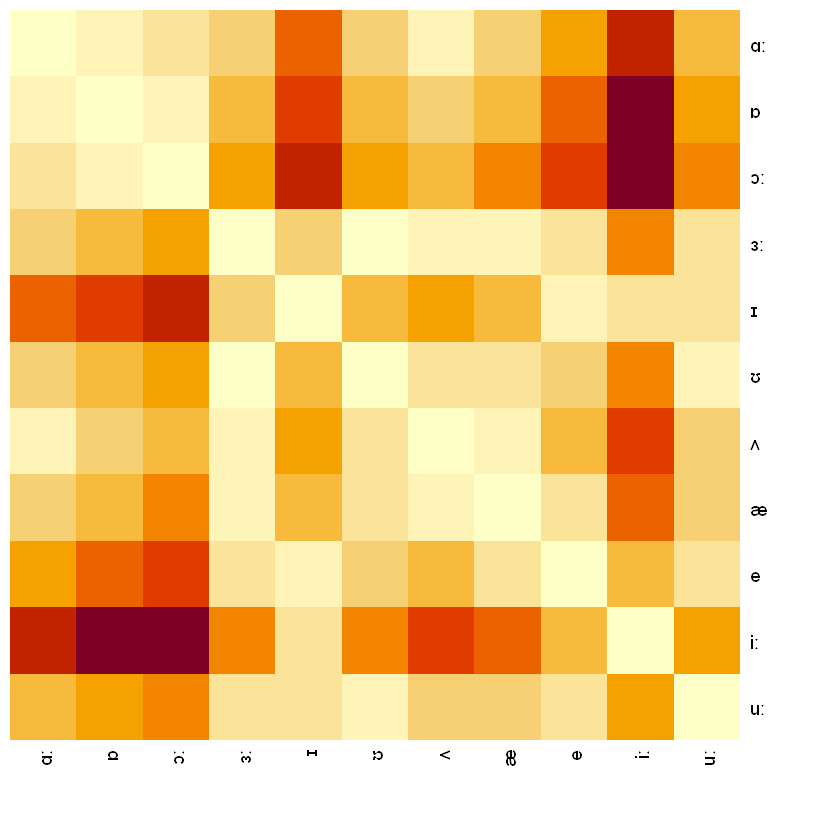

In [92]:
# the distance matrix as a heatmap; yellow is small, dark red is big. 
heatmap(myDists, symm = TRUE, labRow = myMeans$Vowel, labCol = myMeans$Vowel, keep.dendro = FALSE, Rowv=NA, Colv=NA,
       revC = TRUE)



In [114]:
#package foreign not available
library(qgraph)
qgraph(1/myDists, layout=as.matrix(myMeans[,3:2]*-1), vsize=3, labels=unique(myMeans$Vowel), label.cex=1.5)

Warning message:
"package 'qgraph' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'qgraph' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'


This is the sort of image you could get from the previous command line - made from my own RStudio version... but doesn't seem to work in Jupyter:
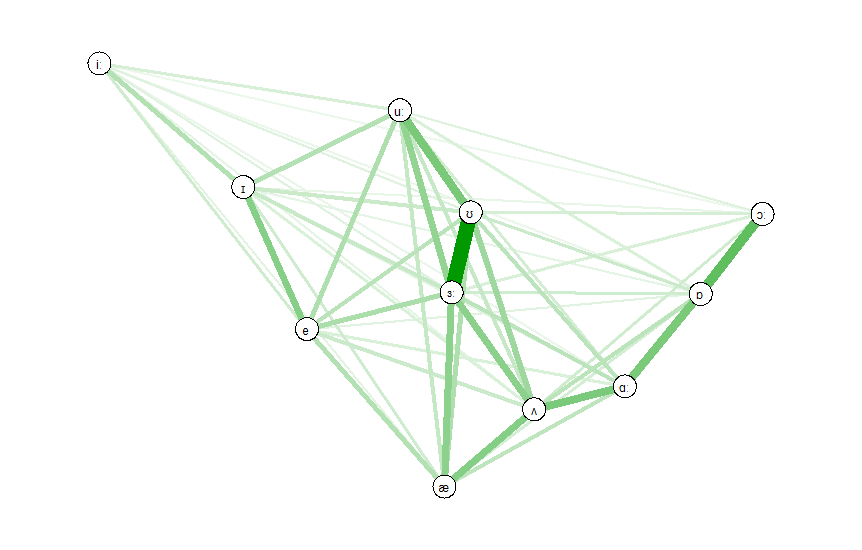


In [113]:
#install.packages("foreign", dependencies=TRUE, repos='http://cran.rstudio.com/')

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"